<a href="https://colab.research.google.com/github/Cyberine101/ML-Algorithms/blob/main/RNN(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network Homework

This is the 4th assignment for CAP 4630 and we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 points, including 15 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement Basic RNN network with Pytorch to predict time series##
### 1.1 Prepare the data (17 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. When you prepared input data X (sequences) and oupt data Y (labels), please consider the following relationship:
    - The sequence X should be the **past 12** datapoints in the time series, i.e., observation sequence with historical window of 12. You may check the time series data and think about the reason.
    - The label Y should be the **next 1** datapoint in the time series (one point ahead prediction).
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


6. After the preparation with scaler fitting, the shapes of trainX, trainY, testX, and testY are as follows:\
trainX.shape = (101, 1, 12)\
trainY.shape = (101,)\
testX.shape = (17, 1, 12)\
testY.shape = (17,)

In [1]:
### Prepare and Preprocess Data Here ###
import numpy as np
from pandas import read_csv
from google.colab import files
uploadTrain = files.upload()
uploadTest = files.upload()

### Design a Function to Prepare Observation Sequences and Corresponding Labels ###

def create_dataset(dataset, look_back=12): # look_back is used to specify input sequence length
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back):
        for j in range(i, i + look_back):

            dataX.append(dataset[j])

        dataY.append(dataset[i + look_back])

    return np.array(dataX), np.array(dataY)


### Train and Test Data Loading with float32 type ####
dataframe_train = read_csv('train.txt', usecols=[1], engine='python') # Read train.txt
dataset_train = dataframe_train.values
dataset_train = dataset_train.astype('float32') # Specify the data type to 'float32'
dataframe_test = read_csv('test.txt', usecols=[1], engine='python')
dataset_test = dataframe_test.values
dataset_test = dataset_test.astype('float32')



### Scale Training and Test Data to [0, 1] ###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # specify the scaler
train = scaler.fit_transform(dataset_train) # fit the scaler to the training data
test = scaler.transform(dataset_test) # fit the scaler to the test data


### Training and Test Data Split ###
trainX, trainY = create_dataset(train, look_back=12)
testX, testY = create_dataset(test, look_back=12)

### Training and Test Data Reshape (to fit RNN input) ###

trainX = np.reshape(trainX, (101, 1, 12))

testX = np.reshape(testX, (17, 1, 12))

print(testX)
print(testY)


Saving test.txt to test.txt


Saving train.txt to train.txt
[[[1.0661157  1.1046832  0.8264463  0.70247936 0.5674931  0.64187324
   0.70523417 0.6556474  0.8319559  0.8044077  0.87052345 1.013774  ]]

 [[1.1046832  0.8264463  0.70247936 0.5674931  0.64187324 0.70523417
   0.6556474  0.8319559  0.8044077  0.87052345 1.013774   1.2231405 ]]

 [[0.8264463  0.70247936 0.5674931  0.64187324 0.70523417 0.6556474
   0.8319559  0.8044077  0.87052345 1.013774   1.2231405  1.2534435 ]]

 [[0.70247936 0.5674931  0.64187324 0.70523417 0.6556474  0.8319559
   0.8044077  0.87052345 1.013774   1.2231405  1.2534435  0.98898065]]

 [[0.5674931  0.64187324 0.70523417 0.6556474  0.8319559  0.8044077
   0.87052345 1.013774   1.2231405  1.2534435  0.98898065 0.8347107 ]]

 [[0.64187324 0.70523417 0.6556474  0.8319559  0.8044077  0.87052345
   1.013774   1.2231405  1.2534435  0.98898065 0.8347107  0.7107438 ]]

 [[0.70523417 0.6556474  0.8319559  0.8044077  0.87052345 1.013774
   1.2231405  1.2534435  0.98898065 0.8347107  0.7107438  0.

### 1.2 - Build the RNN model (20 Points) ##


Build an RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer with hidden_size = 4 and 1 Linear layer.  **(10 Points)**
2. initialize model, optimizer and criterion. **(5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10**. **(5 Points)**

**Hints:**  
1. You use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [2]:
### Build the RNN Model ###
import keras
from keras.models import Sequential

keras.backend.clear_session()

model = Sequential() # Declare Sequential class and assign it to variable "model"
model.add(keras.layers.SimpleRNN(units=4)) # Add a simple RNN layer with unit_size=4 in the model
model.add(keras.layers.Dense(units=1)) # Add a following Dense layer with units=1 in the model

### Compile the RNN Model  ###

opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mean_squared_error", optimizer="adam") # model compiled with mean_squared_error loss and adam optimizer

### Train the RNN Model  ###

model.fit(trainX, trainX, batch_size=10, epochs=1000, verbose=2) # model fit with epoch=1000, batch_size=10; verbose=2 is optional.



Epoch 1/1000
11/11 - 3s - 284ms/step - loss: 0.1934
Epoch 2/1000
11/11 - 0s - 13ms/step - loss: 0.1329
Epoch 3/1000
11/11 - 0s - 11ms/step - loss: 0.1015
Epoch 4/1000
11/11 - 0s - 10ms/step - loss: 0.0838
Epoch 5/1000
11/11 - 0s - 17ms/step - loss: 0.0807
Epoch 6/1000
11/11 - 0s - 25ms/step - loss: 0.0833
Epoch 7/1000
11/11 - 0s - 25ms/step - loss: 0.0820
Epoch 8/1000
11/11 - 0s - 26ms/step - loss: 0.0782
Epoch 9/1000
11/11 - 0s - 5ms/step - loss: 0.0739
Epoch 10/1000
11/11 - 0s - 4ms/step - loss: 0.0756
Epoch 11/1000
11/11 - 0s - 6ms/step - loss: 0.0743
Epoch 12/1000
11/11 - 0s - 6ms/step - loss: 0.0770
Epoch 13/1000
11/11 - 0s - 5ms/step - loss: 0.0732
Epoch 14/1000
11/11 - 0s - 5ms/step - loss: 0.0758
Epoch 15/1000
11/11 - 0s - 5ms/step - loss: 0.0727
Epoch 16/1000
11/11 - 0s - 5ms/step - loss: 0.0710
Epoch 17/1000
11/11 - 0s - 6ms/step - loss: 0.0714
Epoch 18/1000
11/11 - 0s - 4ms/step - loss: 0.0700
Epoch 19/1000
11/11 - 0s - 6ms/step - loss: 0.0682
Epoch 20/1000
11/11 - 0s - 5ms/

### 1.3 Evaluate Predictive Model Performance (10 Points)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Do direct prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Scale the prediction results back to original representation with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. For validation: **Train Score: 125.37 RMSE Test Score: 44.90 RMSE**
3. The plot for validation is shown below (observation test data are blue and prediction results are orange):
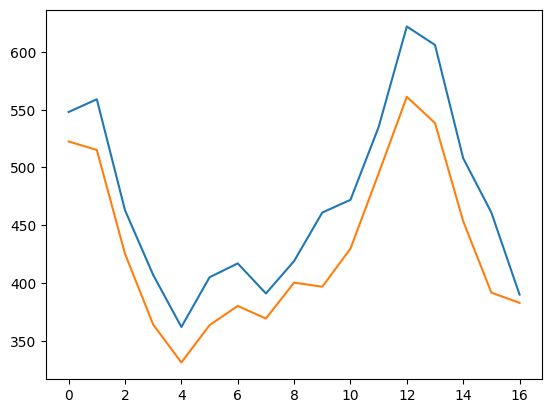

<span style="color:magenta">
**KEY FOR TAs:\
Train Score: 15.16
Test Score: 32.17 are correct.
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Train Score: 72.29 RMSE
Test Score: 220.84 RMSE


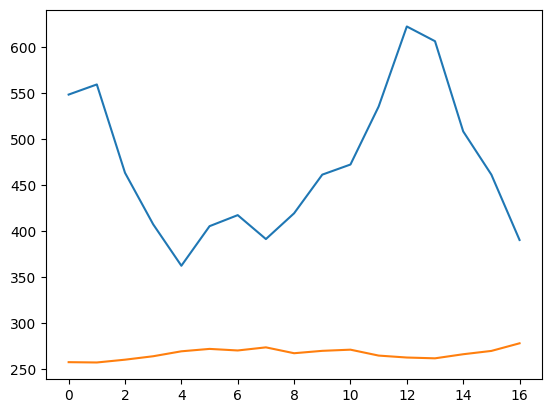

In [3]:
### write your code here
import math
from sklearn.metrics import mean_squared_error # Import mean_squared_error from sklearn.metrics
import matplotlib.pyplot as plt

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict) # scale train prediction back with scaler.inverse_transform()
trainY = scaler.inverse_transform(trainY)  # scale train labels back with scaler.inverse_transform()

testPredict = scaler.inverse_transform(testPredict) # scale test prediction back with scaler.inverse_transform()
testY = scaler.inverse_transform(testY) # scale test labels back with scaler.inverse_transform()

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

plt.plot(testY) # Plot Observations in Test Set
plt.plot(testPredict) # Plot Predictions in Test Set

plt.show()

## 2 - Build an LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (13 Points) ###

Prepare IMDB data for reccurent neural network training.

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(3 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(10 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here. max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.
3. You can start data preprocessing from scractch with raw file, but please get ready for a whole day work.

**Note:**\
We train the built LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [2]:
### write your code here
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
import numpy as np

max_features = 1000  # Only consider the top 1k words
maxlen = 100  # Only consider the first 100 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features) # load IMDB data with specified num_words = 1000; testing set is set to validation set.
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen) # Pad IMDB training data with specified maxlen=100
x_val = keras.preprocessing.sequence.pad_sequences(x_train, maxlen) # Pad IMDB validation data with specified maxlen=100

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 Training sequences
25000 Validation sequences


### 2.2 - Design and train LSTM model (25 Points) ###

Build an LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(10 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. Use **shuffle=True** in Dataloader to ensure data shuffle
7. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
8. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [3]:
### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(input_dim=1000, output_dim=8)(inputs) # Embed data in an 8-dimensional vector
x = layers.LSTM(units=8)(x) # Add 1st layer of LSTM with 8 hidden states (aka units)
outputs = layers.Dense(units=1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10) # Train the compiled model with model.fit()

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.6230 - loss: 0.6335
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8151 - loss: 0.4194
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.8329 - loss: 0.3822
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.8400 - loss: 0.3658
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8382 - loss: 0.3639
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8450 - loss: 0.3537
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.8491 - loss: 0.3484
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8503 - loss: 0.3474
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.8545 - loss: 0.3373
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8549 - loss: 0.3280


### 2.3 - LSTM hyperparameter tuning (Bonus 15 Points) ###

Boost the performance of obtained LSTM (aka vanilla model) by hyperparameter tuning.

**Tasks:**
Note:
- All modificiations are directly conducted based on the vanilla model above (from 2.2).
- For each scenario, **report <span style="color:red"> BEST Validation Accuracy </span> and generate Training/Validation <span style="color:red"> Accuracy plots over epochs</span>**. You may just paste the plot figures in the cells with **Markdown mode**, or leave the result after running. **Make sure it is already correctly shown in your submitted file.**
1.  Scenario 1 (**5 points**):
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 16.
    - Modify the units of LSTM to 16.
2. Scenario 2 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
3. Scenario 3 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
    - Increase analysis length for review data to maxlen = 200
**Hints:**
1. The best method for this part is to reuse your previous code.
2. This part is very time consuming (especially for Scenario 3).


In [4]:
max_features = 1000 # Only consider the top 1k words
maxlen = 100 # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(input_dim=1000, output_dim=16)(inputs) # Embed data in a 16-dimensional vector
x = layers.LSTM(units=16, return_sequences=True)(x) # Add 1st layer of LSTM with 16 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(units=16)(x) # Add 2nd layer of LSTM with 16 hidden states (aka units)
outputs = layers.Dense(units=1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.6644 - loss: 0.5871 - val_accuracy: 0.4968 - val_loss: 1.1787
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.8233 - loss: 0.3937 - val_accuracy: 0.4953 - val_loss: 1.2414
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.8367 - loss: 0.3678 - val_accuracy: 0.4968 - val_loss: 1.2926
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.8428 - loss: 0.3544 - val_accuracy: 0.4973 - val_loss: 1.2809
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.8496 - loss: 0.3467 - val_accuracy: 0.4971 - val_loss: 1.4004
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 105ms/step - accuracy: 0.8503 - loss: 0.3350 - val_accuracy: 0.4972 - val_loss: 1.4554
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8562 - loss: 0.3220 - val_accuracy: 0.4973 - val_loss: 1.4835
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.8553 - loss: 0

In [5]:
max_features = 1000  # Only consider the top 1k words
maxlen = 100 # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(input_dim=1000, output_dim=128)(inputs) # Embed data in a 128-dimensional vector
x = layers.LSTM(units=128, return_sequences=True)(x) # Add 1st layer of LSTM with 128 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(units=128)(x) # Add 2nd layer of LSTM with 128 hidden states (aka units)
outputs = layers.Dense(units=1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 246s 622ms/step - accuracy: 0.7097 - loss: 0.5447 - val_accuracy: 0.4974 - val_loss: 1.3197
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 243s 623ms/step - accuracy: 0.8241 - loss: 0.3912 - val_accuracy: 0.4994 - val_loss: 1.3687
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 672ms/step - accuracy: 0.8479 - loss: 0.3502 - val_accuracy: 0.4976 - val_loss: 1.3374
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 243s 623ms/step - accuracy: 0.8607 - loss: 0.3228 - val_accuracy: 0.4992 - val_loss: 1.4475
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 248s 635ms/step - accuracy: 0.8714 - loss: 0.3028 - val_accuracy: 0.4996 - val_loss: 1.4877
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 258s 660ms/step - accuracy: 0.8781 - loss: 0.2871 - val_accuracy: 0.4987 - val_loss: 1.5780
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 249s 626ms/step - accuracy: 0.8856 - loss: 0.2733 - val_accuracy: 0.4974 - val_loss: 1.5946
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 623ms/step - accuracy: 0.8938 -

In [6]:
max_features = 1000  # Only consider the top 1k words
maxlen = 200 # Only consider the first 100 words of each movie review

### Model design with Embedding and LSTM layers ####
inputs = keras.Input(shape=(None,), dtype="int32") # This is an easy way to set an adaptive length for input sequence
x = layers.Embedding(input_dim=1000, output_dim=128)(inputs) # Embed data in a 128-dimensional vector
x = layers.LSTM(units=128, return_sequences=True)(x) # Add 1st layer of LSTM with 128 hidden states (aka units); set return_sequences=true.
x = layers.LSTM(units=128)(x) # Add 2nd layer of LSTM with 128 hidden states (aka units)
outputs = layers.Dense(units=1, activation="sigmoid")(x) # Add a classifier with units=1 and activation="sigmoid"

### Clear cached model to refresh memory and build new model for training ###
keras.backend.clear_session() # Clear cached model
model = keras.Model(inputs, outputs) # Build new keras model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) # Compile built model with "adam", "binary_crossentropy", and metrics=["accuracy"]
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # Train the compiled model using model.fit() with batch_size=64, epochs=10, and validation_data=(x_val, y_val)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 246s 619ms/step - accuracy: 0.6896 - loss: 0.5538 - val_accuracy: 0.4984 - val_loss: 1.0215
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 284s 675ms/step - accuracy: 0.8217 - loss: 0.3987 - val_accuracy: 0.4981 - val_loss: 1.3033
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 304s 630ms/step - accuracy: 0.8469 - loss: 0.3472 - val_accuracy: 0.4972 - val_loss: 1.3932
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 260s 624ms/step - accuracy: 0.8551 - loss: 0.3267 - val_accuracy: 0.5004 - val_loss: 1.5715
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 622ms/step - accuracy: 0.8724 - loss: 0.3014 - val_accuracy: 0.4973 - val_loss: 1.3208
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 243s 621ms/step - accuracy: 0.8422 - loss: 0.3508 - val_accuracy: 0.4947 - val_loss: 1.5828
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 260s 617ms/step - accuracy: 0.8856 - loss: 0.2741 - val_accuracy: 0.4973 - val_loss: 1.4676
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 245s 628ms/step - accuracy: 0.8902 -